In [4]:
import qiskit
from qiskit import QuantumCircuit
from qiskit.circuit.library import XXPlusYYGate
from qiskit.opflow import I, Z, X, Y
import numpy as np
from qiskit.circuit import ParameterVector
from qiskit.circuit.library import CPhaseGate
from qiskit.algorithms.minimum_eigensolvers import VQE
from qiskit.algorithms.optimizers import SPSA
from qiskit.providers.basicaer import QasmSimulatorPy  
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import Session, Sampler, Options, Estimator

from qiskit.utils import algorithm_globals
from qiskit.primitives import Sampler as Aer_Sam
from qiskit.compiler import transpile
from qiskit.circuit.library import PauliEvolutionGate
from qiskit.providers.fake_provider import FakeManilaV2
from qiskit.primitives import BackendSampler
from qiskit.providers.fake_provider import FakeCairoV2
from qiskit.providers.fake_provider import FakeNairobiV2

C:\Users\pop75\AppData\Local\Temp\ipykernel_18288\3937402186.py:8: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms.minimum_eigensolvers import VQE


In [5]:
from qiskit.primitives import BackendEstimator
from qiskit.primitives import BackendSampler
from qiskit_aer.primitives import Estimator as Aer_Est
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [6]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Save your credentials on disk.
QiskitRuntimeService.save_account(channel='ibm_quantum' ,overwrite=True , token='1eae2868981485982aa94903760557ad663b54573b9110e22d9a0b947f47813e72baceeda052454ec722a377f85d8d08e1e4ad1b3fb477549104042588e4c015')

service = QiskitRuntimeService()

In [7]:
from qiskit_ibm_provider import IBMProvider

# Save your credentials on disk.
IBMProvider.save_account(overwrite=True , token='1eae2868981485982aa94903760557ad663b54573b9110e22d9a0b947f47813e72baceeda052454ec722a377f85d8d08e1e4ad1b3fb477549104042588e4c015')

provider = IBMProvider()

In [8]:
service.backends()

[<IBMBackend('ibm_nairobi')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibm_algiers')>,
 <IBMBackend('ibmq_quito')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('ibmq_mumbai')>,
 <IBMBackend('ibm_lagos')>,
 <IBMBackend('ibm_cairo')>,
 <IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_nazca')>,
 <IBMBackend('ibmq_jakarta')>,
 <IBMBackend('ibm_hanoi')>,
 <IBMBackend('ibm_perth')>,
 <IBMBackend('ibmq_belem')>,
 <IBMBackend('ibmq_guadalupe')>,
 <IBMBackend('ibmq_lima')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('ibmq_kolkata')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('ibmq_manila')>,
 <IBMBackend('ibm_auckland')>,
 <IBMBackend('ibm_cusco')>]

In [9]:
from qiskit.providers.aer import AerSimulator
backend = provider.get_backend('ibm_cairo')
backend_sim = AerSimulator.from_backend(backend)
backend = service.get_backend('ibm_algiers')
backend_sim = AerSimulator.from_backend(backend)

In [10]:
backend = service.get_backend('ibm_cusco')
backend_sim = AerSimulator.from_backend(backend)
"""for i in range(10):
    qc = QuantumCircuit(10)
    qc.x(i)
    res = get_expectaion_value_real(Measure_basis(10),qc)
    exa = get_expectaion_value_Sim(Measure_basis(10),qc)
    print(f'exact : {exa}')
    print(res)"""


"for i in range(10):\n    qc = QuantumCircuit(10)\n    qc.x(i)\n    res = get_expectaion_value_real(Measure_basis(10),qc)\n    exa = get_expectaion_value_Sim(Measure_basis(10),qc)\n    print(f'exact : {exa}')\n    print(res)"

In [11]:
qc=QuantumCircuit(3)

In [13]:
from qiskit.algorithms.optimizers import COBYLA
from qiskit.providers.aer import AerSimulator
backend=FakeCairoV2()


In [ ]:
ac service.backends()

[<IBMBackend('ibm_cairo')>,
 <IBMBackend('ibm_auckland')>,
 <IBMBackend('ibmq_belem')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('ibmq_jakarta')>,
 <IBMBackend('ibm_lagos')>,
 <IBMBackend('ibm_perth')>,
 <IBMBackend('ibmq_kolkata')>,
 <IBMBackend('ibm_nairobi')>,
 <IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('ibmq_quito')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('ibm_hanoi')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibmq_manila')>,
 <IBMBackend('ibm_cusco')>,
 <IBMBackend('ibm_nazca')>,
 <IBMBackend('ibm_seattle')>,
 <IBMBackend('ibmq_guadalupe')>,
 <IBMBackend('ibmq_lima')>,
 <IBMBackend('ibmq_mumbai')>,
 <IBMBackend('ibm_algiers')>,
 <IBMBackend('ibm_brisbane')>]

In [ ]:
backend = service.get_backend('ibmq_kolkata')

In [ ]:
def Foward_diffrentiaion(list, h):
    if len(list) != 5:
        print("lenth is not proper")
        raise NotImplementedError
    else:
        return (1/12*list[0]-2/3*list[1]-0*list[2]+2/3*list[3]-1/12*list[4])/h


def Foward_diffrentiaion_SC(list, h):
    if len(list) != 5:
        print("lenth is not proper")
        raise NotImplementedError
    else:
        return (-1/12*list[0]+4/3*list[1]-5/2*list[2]+4/3*list[3]-1/12*list[4])/h


def fit_curve_exp(my_function, x, y):
    b = -Foward_diffrentiaion_SC(y, 1)/Foward_diffrentiaion(y, 1)
    if b > 5:
        b = 5
    elif b < -5:
        b = -5
    a = -Foward_diffrentiaion(y, 1)/b
    c = y[2]-a
    value1, cov1 = curve_fit(my_function, x, y,
                             maxfev=20000, p0=[a, b, y[2]-a])
    e = Foward_diffrentiaion_SC(y, 1)/Foward_diffrentiaion(y, 1)
    if e > 5:
        e = 5
    elif e < -5:
        e = -5
    d = -Foward_diffrentiaion(y, 1)/e
    f = y[2]-d
    value2, cov2 = curve_fit(my_function, x, y,
                             maxfev=20000, p0=[d, e, y[2]-f])
    if np.sum(cov1**2) > np.sum(cov2**2):
        value = value2
    else:
        value = value1
    return value

In [ ]:
def Hamiltonian(num_sites,U,t):
    a = []
    a_ = []
    for i in range(num_sites*2):
        cre = ((X-1j*Y)/2)
        ani = ((X+1j*Y)/2)
        if i ==0:
            temp = 1
        else : 
            temp = Z
        for j in range(i-1):
            temp = temp^Z
        a.append(temp^cre^(I^(2*num_sites-i-1)))
        a_.append(temp^ani^(I^(2*num_sites-i-1)))
    ## number_op
    n=[]
    for i in range(num_sites):
        n.append(U*((a[i]@a_[i])@(a[i+num_sites]@a_[i+num_sites])))
    ## cross_op
    Cross=[]
    for i in range(num_sites-1):
        Cross.append(-t*((a_[i]@a[i+1])+(a_[i+1]@a[i])))
    for i in range(num_sites-1):
        Cross.append(-t*(a_[i+num_sites]@a[i+1+num_sites]+a_[i+num_sites+1]@a[i+num_sites]))
    Hamiltonian=0*I^num_sites*2
    for i in Cross:
        Hamiltonian+=i
    for i in n:
        Hamiltonian+=i
    return Hamiltonian.reduce()
        

In [ ]:
def Hamiltonian1(Q_num,J=1,l=1,h=1):
    H = []
    for i in range(Q_num-1):
        if i == 0:
            op = -J*((Z ^ Z)+h*(l*I ^ X)+(I ^ Z))
        else:
            op = I
        for j in range(1, Q_num-1):
            if j == i:
                op = op ^ (-J*((Z ^ Z)+h*(l*I ^ X)+(I ^ Z)))
            else:
                op = op ^ I
        H.append(op)
    A = -h*X
    for i in range(Q_num-1):
        A = A ^ I
    for i in H:
        A = A+i
    B = -J*Z
    for i in range(Q_num-1):
        B = B ^ I
    A = A+B

    return(A)

In [ ]:
from qiskit.opflow import StateFn, PauliExpectation, CircuitSampler
from qiskit_aer import AerSimulator
def get_expectaion_value_real(Ham,time_H,shots = 50000):
    estimator = BackendEstimator(backend_sim)
    estimator.set_transpile_options(optimization_level=0)
    time_H=transpile(time_H,optimization_level=0)
    job = estimator.run(circuits=time_H,observables=[Ham],shots=shots,optimization_level=0)
    result=job.result().values[0]
    return result
def get_Prob_real(time_H):
    sampler = BackendEstimator(backend = backend_sim)
    job = sampler.run(time_H)
    result=job.result()
    return result

In [ ]:
def my_function(x, a, b, c):
    return a * np.exp(-b * x) + c

In [ ]:

def get_expectaion_value_Sim(Ham,time_H):
    estimator = Aer_Est(run_options={'shots':50000})
    job = estimator.run(circuits=time_H,observables=[Ham])
    result=job.result().values
    return result
def get_Prob_Sim(time_H):
    time_H.measure_all()
    sampler = Aer_Sam()
    job = sampler.run(time_H)
    result=job.result()
    return result
def get_expectaion_value_IBMQ(Ham, qc_list):
    Hams=[]
    for i in range(len(qc_list)):
        Hams.append(Ham)
    options=Options()
    options.optimization_level = 0
    options.shots =20000
    with Session(service=service, backend=backend) as session:
        estimator=Estimator(session=session,options=options)
        job = estimator.run(circuits=qc_list,observables=Hams)
        result = job.result().values
    return result

In [ ]:
def sampler_result_IBMQ(qc_list,parameters=None):
    temp_list = []
    for i in qc_list:
        if i.clbits == 0:
            i.measure_all()
            temp_list.append(i)
    options=Options()
    options.optimization_level = 0
    options.shots =20000
    with Session(service=service, backend=backend) as session:
        sampler=Sampler(session=session,options=options)
        job = sampler.run(circuits=temp_list)
        result_list = job.result().quasi_dists
    resultant_list = []
    for result in result_list:
        key_values = list(result.keys())
        values = list(result.values())
        resultant = {}
        index = 0
        for i in key_values:
            temp = format(i,'b').zfill(int(qc.num_qubits))
            resultant[temp] = values[index]
            index += 1
        resultant_list.append(resultant)
    return resultant_list
    

In [ ]:
def Measure_basis(Q_num):
    H = Z ^ (I ^ (Q_num-1))
    for i in range(Q_num-1):
        A = I
        for j in range(Q_num-1):
            k = j
            if k != i:
                A = A ^ I
            else:
                A = A ^ Z

        H = H+A

    return(H)


In [ ]:
def HV_ansatz(num_sites,reps=1):
    qc = QuantumCircuit(num_sites*2,name = 'HV_ansatz')
    parameter = ParameterVector('theta1',num_sites*reps)
    parameter1 =  ParameterVector('theta2',(num_sites-1)*2*reps)
    parameter2 =  ParameterVector('theta3',(num_sites-1)*2*reps)
    for j in range(reps):
        for i in range(num_sites-1):
            temp = i+(num_sites-1)*j*2
            qc.append(XXPlusYYGate(parameter1[temp],parameter2[temp]),[i,i+1])
        for i in range(num_sites-1):
            temp = i+(num_sites-1)*j*2
            qc.append(XXPlusYYGate(parameter1[temp+num_sites-1],parameter2[temp+num_sites-1]),[i+num_sites,i+1+num_sites])
        for i in range(num_sites):
            temp = i+(num_sites)*j
            qc.append(CPhaseGate(parameter[temp]),[i,i+num_sites])
    return qc

In [ ]:
def sampler_result(qc,parameters=None):
    temp1 = QuantumCircuit(qc.num_qubits)
    if parameters!=None:
        for i in parameters:
            temp1 = qc.bind_parameters(parameters)
    else:
        temp1 = qc
    temp1.measure_all()
    sampler = BackendSampler(backend=backend_sim)
    job = sampler.run(temp1)
    result = job.result().quasi_dists[0]
    key_values = list(result.keys())
    values = list(result.values())
    resultant = {}
    index = 0
    for i in key_values:
        temp = format(i,'b').zfill(int(qc.num_qubits))
        resultant[temp] = values[index]
        index += 1

    return resultant
    

In [ ]:
class hubard_trotter():
    def __init__(self,num_qubits, step, tau,Hamiltonian,initial_state=None,backend=None):
        self.num = num_qubits
        self.t = tau/step
        self.gate = PauliEvolutionGate(Hamiltonian,time=self.t)
        if initial_state == None:
            self.init = '0'*self.num
        else:
            self.init = initial_state
        if backend == None:
            self.backend = service.backends(simulator=True)[0]
        else : 
            self.backend = backend
        self.reps = step
    def circ(self):
        qc = QuantumCircuit(self.num)
        qc.initialize(self.init)
        qc = qc.decompose(reps=1)
        for i in range(self.reps):
            qc.append(self.gate,qc.qubits)
        qc = qc.decompose(reps=3)
        qc = transpile(qc,optimization_level=3)
        qc = qc.decompose(reps=2)
        return qc
    def extra_polate(self,reps):
        qc = self.circ()
        temp1 = qc.qasm()
        temp = temp1.split('\n')
        temp_temp = []
        for i in temp:
            temp = i.split(' ')
            if temp[0]=='cx':
                temp_temp.append(i)
                for j in range(reps):
                    temp_temp.append(i)
                    temp_temp.append(i)
            else:
                temp_temp.append(i)
        temp_temp_conbine = '\n'.join(temp_temp)
        qc_result = QuantumCircuit(self.num)
        qc_result = qc_result.from_qasm_str(temp_temp_conbine)
        return qc_result


In [ ]:
class IBM_analy():
    def __init__(self,values,round = 3, name = None, polate_num = None):
        if len(values)==0:
            self.std = []
            self.mean = []
        else:
            self.std = [np.round(np.std(values),round)]
            self.mean = [np.round(np.mean(values),round)]
        self.round = round
        self.name = name
        if polate_num != None:
            self.p_num = [polate_num]
        else:
            self.p_num = []
    def append(self,values,polate_num = None):
        round = self.round
        self.std.append(np.round(np.std(values),round))
        self.mean.append(np.round(np.mean(values),round))
        if polate_num != None:
            self.p_num.append(polate_num)
        

In [ ]:
IBM_list = []
for i in service.backends(simulator = False):
    IBM_list.append(IBM_analy([],name=i.name))

In [ ]:
k = 3
polate_num = 3
B = hubard_trotter(num_qubits,2,1*k,Hamiltonian=Ham,initial_state=initial_state).extra_polate(polate_num)
exact_data = get_expectaion_value_Sim(Meas,B)
print("Exact data : ", exact_data)
index = 0
for i in service.backends(simulator = False):
    result_list = []
    backend = i
    if backend.num_qubits<num_qubits:
        index +=1
        continue
    try:
        backend_sim = AerSimulator.from_backend(backend)
    except:
        index +=1
        continue
    for j in range(20):
        result_list.append(get_expectaion_value_real(Meas,B))
    result_list = np.round(result_list,3)
    IBM_list[index].append(result_list,polate_num)
    print(f"결과 : {result_list}")
    std = np.std(result_list)
    print(f"백엔드 : {i} , 표준편차 : {std}")
    print(f"최대 - 최소 : {np.max(result_list)-np.min(result_list)}")
    print("\n")
    index +=1

Exact data :  [-1.49876]
결과 : [-0.508  0.247 -0.55  -0.555 -0.556 -0.48   0.235 -0.549  0.31   0.404
  0.25   0.249 -0.549 -0.609 -0.529 -0.615 -0.515  0.279 -0.523 -0.645]
백엔드 : <IBMBackend('ibm_cairo')> , 표준편차 : 0.40099008404198727
최대 - 최소 : 1.049


결과 : [-0.089  0.453  0.367  0.347  0.554 -0.033  0.345 -0.056  0.509 -0.08
  0.344 -0.108  0.503  0.442  0.498  0.361  0.494  0.532 -0.125  0.508]
백엔드 : <IBMBackend('ibmq_kolkata')> , 표준편차 : 0.25089681145841614
최대 - 최소 : 0.679


결과 : [-0.513 -0.492 -0.558 -0.572 -0.417 -0.581 -0.451 -0.489 -0.529 -0.498
 -0.508 -0.523 -0.441 -0.634 -0.524 -0.565 -0.444 -0.492 -0.374 -0.501]
백엔드 : <IBMBackend('ibm_hanoi')> , 표준편차 : 0.059558458677168594
최대 - 최소 : 0.26


결과 : [-0.505 -0.505 -0.491 -0.475 -0.49  -0.491 -0.508 -0.487 -0.491 -0.48
 -0.521 -0.502 -0.502 -0.496 -0.472 -0.487 -0.493 -0.48  -0.513 -0.516]
백엔드 : <IBMBackend('ibm_sherbrooke')> , 표준편차 : 0.013213156322393234
최대 - 최소 : 0.049000000000000044


결과 : [-0.868 -0.877 -0.872 -0.85  -0.867 -0.8

In [ ]:
min = 1000
max = 0
index = 0
min_dex = 0
max_dex = 0
for i in IBM_list:
    try:
        if min>i.std[0]:
            min = i.std
            min_dex = index
        if max<i.std[0]:
            max = i.std
            max_dex = index
        index+=1
    except:
        index +=1 

In [ ]:
backend = service.backend(IBM_list[min_dex].name)
backend_sim = AerSimulator.from_backend(backend)

In [ ]:
backend = service.backend(IBM_list[max_dex].name)
backend_sim = AerSimulator.from_backend(backend)

비율: 1
[-0.15032]
result is  [-4.00087974]
exact is  -4.0
Raw_data is  -3.85128


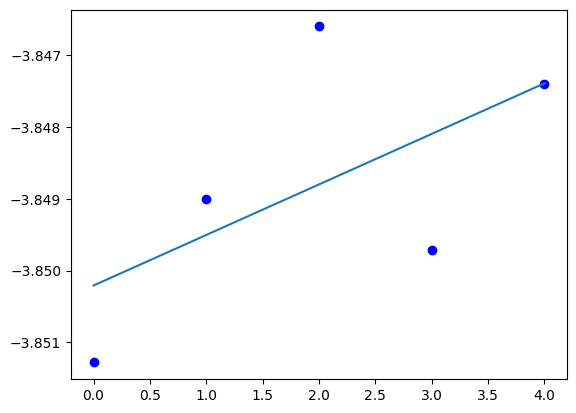

비율: 0.8067760370539627
[-0.12127457]
result is  [-3.35865966]
exact is  -3.4173999999999998
Raw_data is  -3.00328


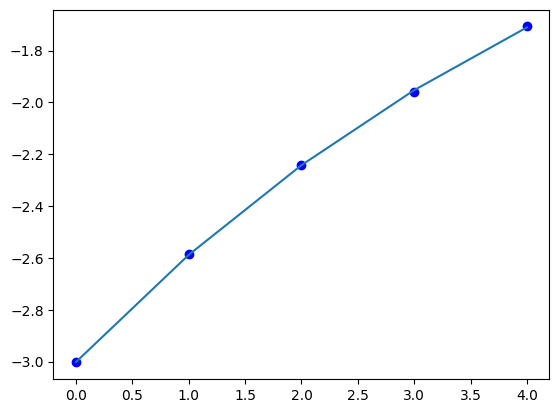

비율: 0.6608225106127548
[-0.09933484]
result is  [-2.48981776]
exact is  -2.53888
Raw_data is  -2.22272


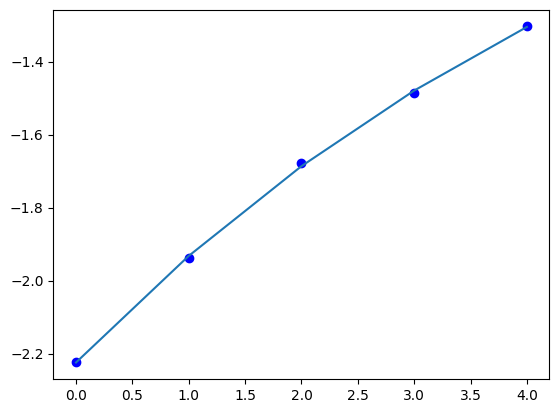

비율: 0.5557659036365674
[-0.08354273]
result is  [-1.61124391]
exact is  -1.64152
Raw_data is  -1.4352800000000001


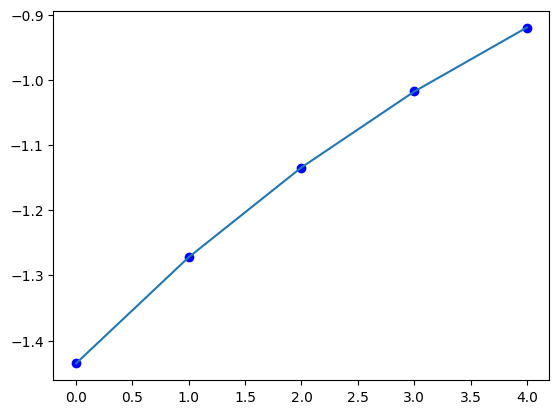

비율: 0.4985185152621431
[-0.0749373]
result is  [-0.62238418]
exact is  -0.6343200000000001
Raw_data is  -0.54388


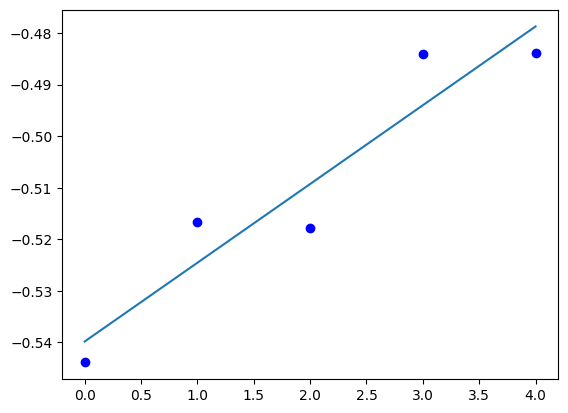

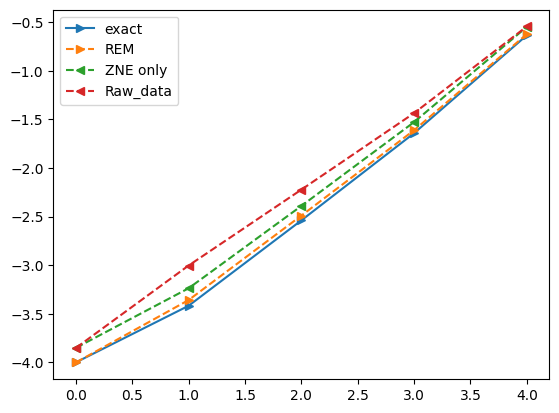

In [ ]:
initial_state = '11001111'
num_qubits = 8
qc = QuantumCircuit(num_qubits)
qc.initialize(initial_state)
qc = qc.decompose(reps=1)
REM_list = []
exact_data = []
list_ = []
Raw_data = []
Meas = Measure_basis(num_qubits)
Ham = Hamiltonian1(num_qubits,h=0.3)
for k in range(0,5):
    temp_list = []
    x_list = []
    for j in range(5):
        B = hubard_trotter(num_qubits,5,1*k,Hamiltonian=Ham,initial_state=initial_state).extra_polate(j)
        result = get_expectaion_value_real(Meas,B)
        temp_list.append(result)
        x_list.append(j)
    B = hubard_trotter(num_qubits,5,1*k,Hamiltonian=Ham,initial_state=initial_state).extra_polate(0)
    result = get_expectaion_value_Sim(Meas,B)
    exact_data.append(result[0])
    value = fit_curve_exp(my_function, x_list, temp_list)
    fit_list = []
    if k == 0:
        fit_0 = sampler_result(hubard_trotter(num_qubits,3,0.5*k,Hamiltonian=Ham,initial_state=initial_state).extra_polate(0))[initial_state]
    else:
        try:
            fit = sampler_result(hubard_trotter(num_qubits,3,0.5*k,Hamiltonian=Ham,initial_state=initial_state).extra_polate(0))[initial_state]
        except:
            fit = 0
    for i in x_list:
        fit_list.append(my_function(i,*value))
    if k == 0:
        REM_0 = get_expectaion_value_Sim(Meas,qc) - get_expectaion_value_real(Meas,qc)
        REM = REM_0
    else : 
        REM = (REM_0)*np.sqrt((fit/fit_0))
    if len(REM_list) == 0:
        print("비율:", 1)
    else:
        print("비율:", np.sqrt((fit/fit_0)))
    print(REM)
    print("result is " ,my_function(-0.5,*value)+REM)
    print("exact is ",exact_data[k])
    print("Raw_data is ", temp_list[0])
    REM_list.append((my_function(-0.5,*value)+REM)[0])
    list_.append((my_function(-0.5,*value)))
    Raw_data.append(temp_list[0])
    plt.plot(x_list,temp_list,'bo')
    plt.plot(x_list,fit_list)
    plt.show()
plt.plot(x_list,exact_data,"->",label="exact")
plt.plot(x_list,REM_list,"-->",label="REM")
plt.plot(x_list,list_,"<--",label="ZNE only")
plt.plot(x_list,Raw_data,"<--",label="Raw_data")
plt.legend()



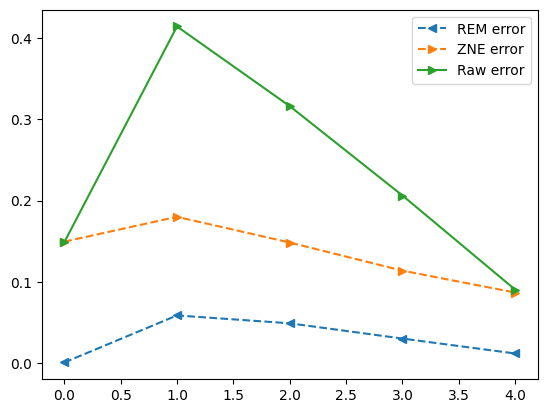

In [ ]:
plt.plot(x_list,abs(np.array(exact_data)-np.array(REM_list)),"<--",label="REM error")
plt.plot(x_list, abs(np.array(exact_data)-np.array(list_)),"-->",label="ZNE error")
plt.plot(x_list,abs(np.array(exact_data)-Raw_data),"->",label="Raw error")
plt.legend()

In [ ]:
## real backend
initial_state = '101111'
num_qubits = 6
qc = QuantumCircuit(num_qubits)
qc.initialize(initial_state)
qc = qc.decompose(reps=1)
qc_list = []
REM_list = []
exact_data = []
list_ = []
Raw_data = []
fit_list = []
Meas = Hamiltonian1(num_qubits)
for k in range(0,5):
    temp_list = []
    x_list = []
    for j in range(5):
        qc_list.append(hubard_trotter(num_qubits,3,1*k,Hamiltonian=Hamiltonian1(num_qubits),initial_state=initial_state).extra_polate(j))
        temp_list.append(result)
        x_list.append(j)
    B = hubard_trotter(num_qubits,3,1*k,Hamiltonian=Hamiltonian1(num_qubits),initial_state=initial_state).extra_polate(0)
    result = get_expectaion_value_Sim(Meas,B)
    exact_data.append(result)
fit_ = []
for i in range(5):
    fit_.append(qc_list[5*i])
All_res = get_expectaion_value_IBMQ(qc_list=qc_list,Ham=Meas)
Fit_res = sampler_result_IBMQ(qc_list=fit)

for k in range(0,5):
    temp_list = [All_res[i] for i in range(5*k,5*k+5)]
    fit_0 = Fit_res[0]
    fit = Fit_res[k]
    value = fit_curve_exp(my_function, x_list, temp_list)
    for i in x_list:
        fit_list.append(my_function(i,*value))
    if k == 0:
        REM_0 = exact_data[0] - All_res[0]
        REM = REM_0
    else : 
        REM = (REM_0)*np.sqrt((fit/fit_0))
    if len(REM_list) == 0:
        print("비율:", 1)
    else:
        print("비율:", np.sqrt((fit/fit_0)))
    print(REM)
    print("result is " ,my_function(-0.5,*value)+REM)
    print("exact is ",exact_data[k])
    print("Raw_data is ", temp_list[0])
    REM_list.append((my_function(-0.5,*value)+REM)[0])
    list_.append((my_function(-0.5,*value)))
    Raw_data.append(temp_list[0])
    plt.plot(x_list,temp_list,'bo')
    plt.plot(x_list,fit_list)
    plt.show()
plt.plot(x_list,exact_data,"->",label="exact")
plt.plot(x_list,REM_list,"-->",label="REM")
plt.plot(x_list,list_,"<--",label="ZNE only")
plt.plot(x_list,Raw_data,"<--",label="Raw_data")
plt.legend()

runtime_job._start_websocket_client:WARNING:2023-08-04 18:44:59,147: An error occurred while streaming results from the server for job cj6a690l9m0cictjh2r0:
Traceback (most recent call last):
  File "c:\Users\pop75\anaconda3\envs\name_of_my_env\lib\site-packages\qiskit_ibm_runtime\runtime_job.py", line 511, in _start_websocket_client
    self._ws_client.job_results()
  File "c:\Users\pop75\anaconda3\envs\name_of_my_env\lib\site-packages\qiskit_ibm_runtime\api\clients\runtime_ws.py", line 70, in job_results
    self.stream(url=url, retries=max_retries, backoff_factor=backoff_factor)
  File "c:\Users\pop75\anaconda3\envs\name_of_my_env\lib\site-packages\qiskit_ibm_runtime\api\clients\base.py", line 230, in stream
    raise WebsocketError(error_message)
qiskit_ibm_runtime.api.exceptions.WebsocketError: 'Max retries exceeded: Failed to establish a websocket connection. Error: Traceback (most recent call last):\n  File "c:\\Users\\pop75\\anaconda3\\envs\\name_of_my_env\\lib\\site-packages\\

RequestsApiError: "HTTPSConnectionPool(host='runtime-us-east.quantum-computing.ibm.com', port=443): Max retries exceeded with url: /jobs/cj6a690l9m0cictjh2r0 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000232A207A920>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))"